<a href="https://colab.research.google.com/github/Ravhihz/Sentinanalytica/blob/main/Text_Preprocessing_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MBG_Merge.csv to MBG_Merge.csv


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("MBG_Merge.csv")

df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username;;;;;;;
0,1877134921455555002,Wed Jan 08 23:26:55 +0000 2025,0,Dengan MBG UMKM sebar suara agar anak-anak dap...,1877134921455555002,https://pbs.twimg.com/media/GgzsL0JaMAEuqk6.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/187713492145555...,1711942211200483328,;;;;;;;
1,1877134530437353914,Wed Jan 08 23:25:22 +0000 2025,0,Kehadiran UMKM buat MBG jadi solusi efektif me...,1877134530437353914,https://pbs.twimg.com/media/Ggzr5ZkaMAASzfx.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/187713453043735...,1701804750742986752,;;;;;;;
2,1877115246889849262,Wed Jan 08 22:08:44 +0000 2025,0,Dengan MBG UMKM membantu masyarakat mendapatka...,1877115246889849262,https://pbs.twimg.com/media/GgzaWfxaMAA8Dkf.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/187711524688984...,1693844411166404608,;;;;;;;
3,1877137580111569364,Wed Jan 08 23:37:29 +0000 2025,0,UMKM keroyokan banget di MBG demi masyarakat l...,1877137580111569364,https://pbs.twimg.com/media/GgzurX3aMAIQYRI.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/187713758011156...,1701441338712162304,;;;;;;;
4,1877134528675717178,Wed Jan 08 23:25:21 +0000 2025,0,Salut buat kemajuan MBG berkat keterlibatan pe...,1877134528675717178,https://pbs.twimg.com/media/Ggzr5xAaMAEQM_Z.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/187713452867571...,1698915447553597440,;;;;;;;


Asli:
 Dengan MBG UMKM sebar suara agar anak-anak dapatkan manfaat seutuhnya #UMKMDukungMBG https://t.co/5DFTlg6UDK

Tokenized:
 ['dengan', 'mbg', 'umkm', 'sebar', 'suara', 'agar', 'anakanak', 'dapatkan', 'manfaat', 'seutuhnya', 'umkmdukungmbg', 'httpstcodftlgudk']

🔠 20 Kata paling sering muncul:
mbg: 6053
makan: 4642
gratis: 4350
bergizi: 4301
program: 3827
dan: 2790
di: 2742
yang: 2012
ini: 1713
bgn: 1622
untuk: 1526
yg: 1449
anak: 1215
prabowo: 1083
ada: 1058
indonesia: 1057
gizi: 1019
dari: 971
keracunan: 842
itu: 800


<Axes: title={'center': '20 Kata Paling Sering Muncul'}, xlabel='Samples', ylabel='Counts'>

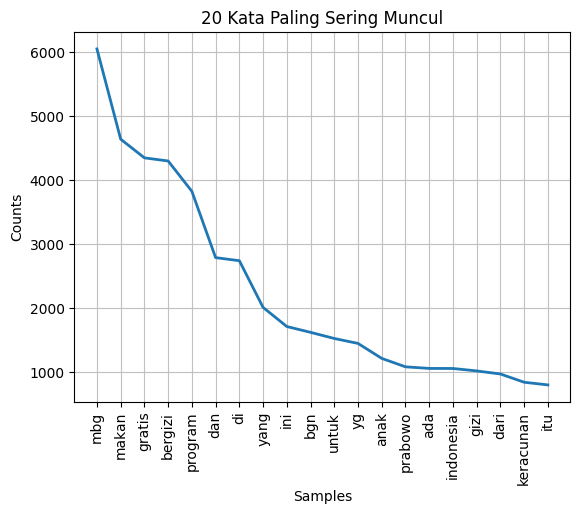

In [ ]:
# ======== Import library ========
import re, string
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Pastikan resource tersedia
# nltk.download('punkt')
# nltk.download('stopwords')

# ======== Load dataset ========
df = pd.read_csv("/content/MBG_Merge.csv")

# ======== Fungsi Preprocessing ========
def preprocess_sentence(sentence: str):
    s = sentence.lower()                                       # Case folding
    s = re.sub(r"\d+", "", s)                                  # Hapus angka
    s = s.translate(str.maketrans("", "", string.punctuation)) # Hapus tanda baca
    s = s.strip()                                              # Trim spasi
    s = re.sub(r"\s+", " ", s)                                 # Rapikan spasi
    tokens = word_tokenize(s)                                  # Tokenizing
    return tokens

# ======== Terapkan ke seluruh dataset ========
df['tokens'] = df['full_text'].astype(str).apply(preprocess_sentence)

# Simpan hasil
df.to_csv('/content/MBG_Tokenized.csv', index=False)

# ======== Cek contoh hasil pertama ========
sample = df['full_text'].astype(str).iloc[0]
print("Asli:\n", sample)
print("\nTokenized:\n", preprocess_sentence(sample))

# ======== Hitung frekuensi kata seluruh dataset ========
# Gabungkan semua token menjadi satu list besar
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# Hitung frekuensi
freq_dist = FreqDist(all_tokens)

# Tampilkan 20 kata paling sering muncul
print("\n🔠 20 Kata paling sering muncul:")
for word, freq in freq_dist.most_common(20):
    print(f"{word}: {freq}")

# ======== (Opsional) Visualisasi cepat frekuensi ========
freq_dist.plot(20, cumulative=False, title="20 Kata Paling Sering Muncul")


Sebelum Stopword Removal:
 ['dengan', 'mbg', 'umkm', 'sebar', 'suara', 'agar', 'anakanak', 'dapatkan', 'manfaat', 'seutuhnya', 'umkmdukungmbg', 'httpstcodftlgudk']

Sesudah Stopword Removal:
 ['mbg', 'umkm', 'sebar', 'suara', 'anakanak', 'dapatkan', 'manfaat', 'seutuhnya', 'umkmdukungmbg', 'httpstcodftlgudk']

🔠 20 Kata paling sering muncul (tanpa stopword):
mbg: 6053
makan: 4642
gratis: 4350
bergizi: 4301
program: 3827
bgn: 1622
yg: 1449
anak: 1215
prabowo: 1083
indonesia: 1057
gizi: 1019
keracunan: 842
makanbergizigratis: 758
sekolah: 722
sppg: 658
ga: 625
sehat: 618
presiden: 579
aja: 565
pemerintah: 555


<Axes: title={'center': '20 Kata Terpopuler (Tanpa Stopword)'}, xlabel='Samples', ylabel='Counts'>

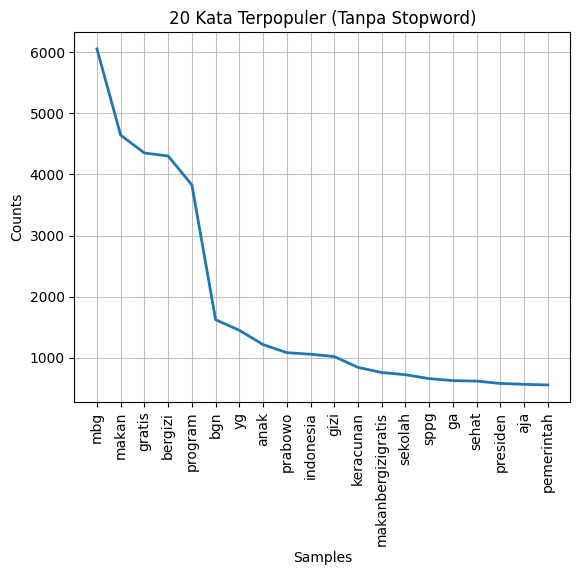

In [ ]:
# ======== Import library ========
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Pastikan stopwords bahasa Indonesia sudah terunduh
# nltk.download('stopwords')

# ======== Ambil daftar stopword Bahasa Indonesia ========
list_stopwords = set(stopwords.words('indonesian'))

# ======== Hapus stopword dari kolom 'tokens' ========
df['tokens_no_stopword'] = df['tokens'].apply(
    lambda token_list: [word for word in token_list if word not in list_stopwords]
)

# ======== Simpan hasil baru ========
df.to_csv('/content/MBG_NoStopword.csv', index=False)

# ======== Cek contoh hasil ========
print("Sebelum Stopword Removal:\n", df['tokens'].iloc[0])
print("\nSesudah Stopword Removal:\n", df['tokens_no_stopword'].iloc[0])

# ======== Frekuensi kata tanpa stopword ========
all_tokens_no_stopword = [t for token_list in df['tokens_no_stopword'] for t in token_list]
freq_dist_no_stopword = FreqDist(all_tokens_no_stopword)

print("\n🔠 20 Kata paling sering muncul (tanpa stopword):")
for word, freq in freq_dist_no_stopword.most_common(20):
    print(f"{word}: {freq}")

# (Opsional) Visualisasi
freq_dist_no_stopword.plot(20, cumulative=False, title="20 Kata Terpopuler (Tanpa Stopword)")


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
# ======== Import library ========
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm

# Aktifkan tqdm untuk pandas
tqdm.pandas()

# ======== Buat objek stemmer ========
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# ======== Terapkan ke kolom tanpa stopword (dengan progress bar) ========
df['tokens_stemmed'] = df['tokens_no_stopword'].progress_apply(
    lambda token_list: [stemmer.stem(word) for word in token_list]
)

# ======== Simpan hasil ========
df.to_csv('/content/MBG_Stemmed.csv', index=False)

# ======== Cek contoh hasil ========
print("Sebelum Stemming:\n", df['tokens_no_stopword'].iloc[0])
print("\nSesudah Stemming:\n", df['tokens_stemmed'].iloc[0])


100%|██████████| 9792/9792 [41:47<00:00,  3.90it/s]


Sebelum Stemming:
 ['mbg', 'umkm', 'sebar', 'suara', 'anakanak', 'dapatkan', 'manfaat', 'seutuhnya', 'umkmdukungmbg', 'httpstcodftlgudk']

Sesudah Stemming:
 ['mbg', 'umkm', 'sebar', 'suara', 'anakanak', 'dapat', 'manfaat', 'utuh', 'umkmdukungmbg', 'httpstcodftlgudk']
